<h2><center><b><i>Cluster bomb</b></i>: Uncovering Patterns in Terrorist Group Beliefs and Attacks</center></h2>

#### **COM-480: Data Visualization**

**Team**: Alexander Sternfeld, Silvia Romanato & Antoine Bonnet

**Dataset**: [Global Terrorism Database (GTD)](https://www.start.umd.edu/gtd/) 

**Additional dataset**: [Profiles of Perpetrators of Terrorism in the United States (PPTUS)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl%3A1902.1/17702)

## Exploratory Data Analysis
 

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Part 1: Global Terrorism Database (GTD)

### Loading the data

> To run our code, please [download the dataset](https://www.start.umd.edu/gtd/contact/download) by filling out the form. After a few minutes, you will receive two data files `GTD1.xlsx` and `GTD2.xslx`. Place both files in the `/data` folder.

In [32]:
# If the data is already combined, read it
GTD_path = 'data/GTD.pkl'

if os.path.exists(GTD_path):
    GTD = pd.read_pickle(GTD_path)
elif os.path.exists('data/GTD1.xlsx') and os.path.exists('data/GTD2.xlsx'):
    # Read data, ignore unicode errors
    GTD_1 = pd.read_excel('data/GTD1.xlsx')
    GTD_2 = pd.read_excel('data/GTD2.xlsx')
    # Append the two dataframes and save in a serialized format
    GTD = GTD_1.append(GTD_2)
    GTD.to_pickle(GTD_path)
else:
    print('GTD data not found, please download and put it in data/ folder.')

GTD.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Na

### 1. Number of attacks

In [12]:
# Plot distribution of column 'iyear'
sns.histplot(df['iyear'])
plt.xlabel('Year')
# give title
plt.ylabel('Number of attacks')
plt.show()


NameError: name 'df' is not defined

### 2. Geographic breakdown

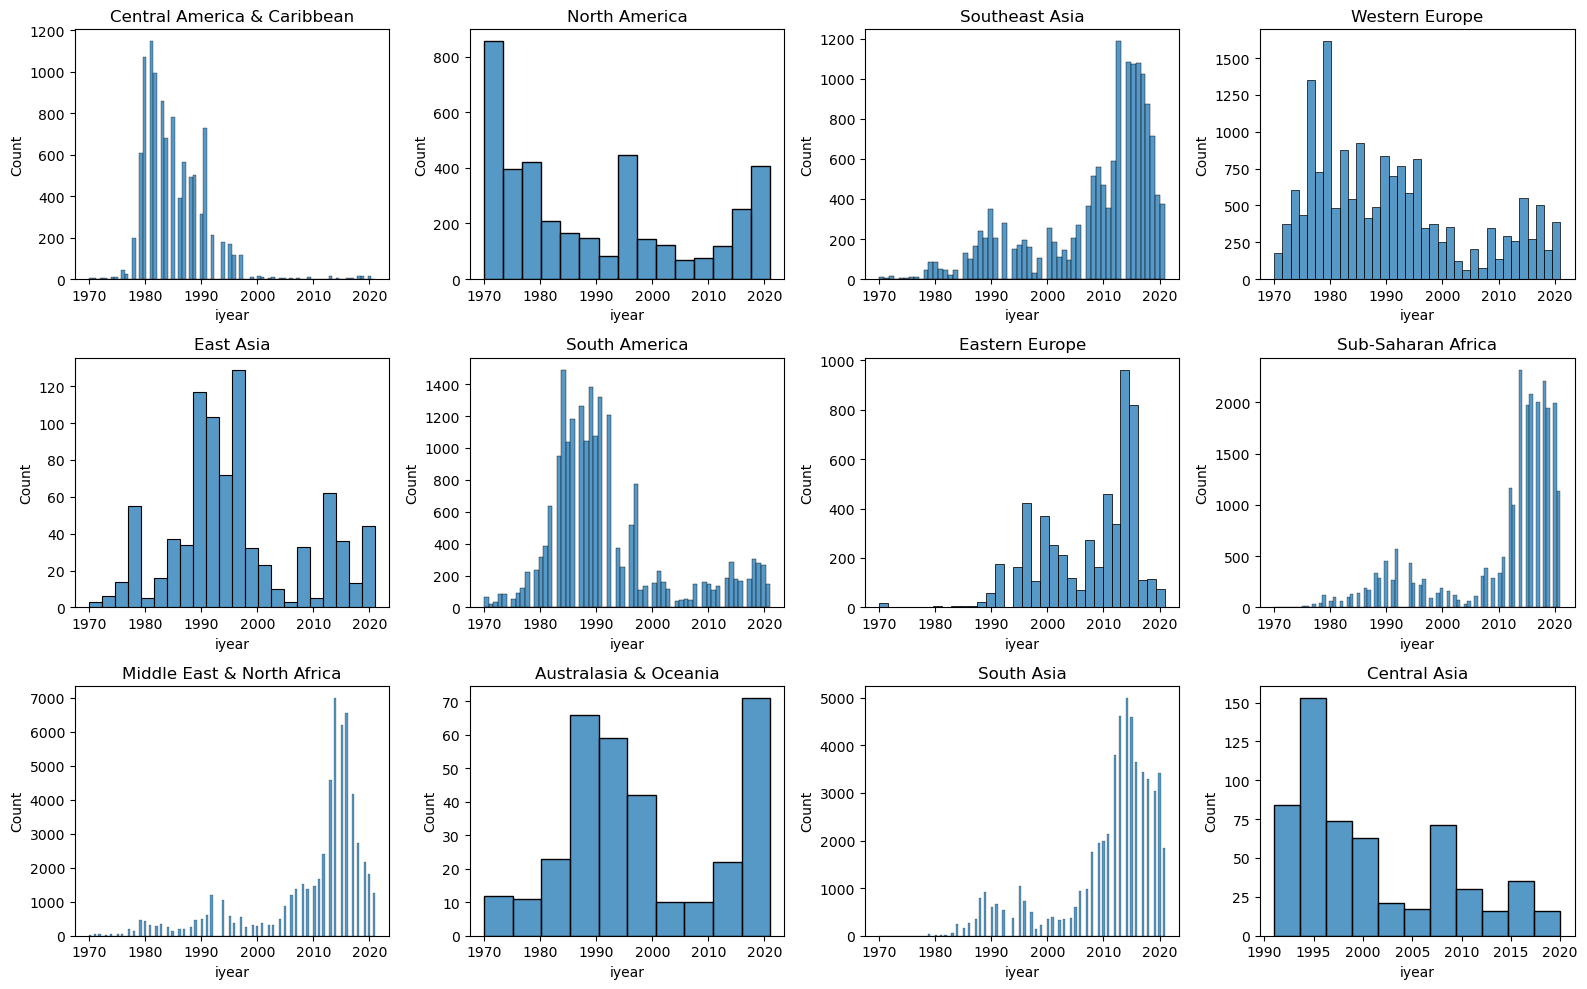

In [ ]:
# For each region, plot the number of attacks per year
# create subplots
fig, ax = plt.subplots(3, 4, figsize=(16, 10))
# create a list of regions
regions = GTD['region_txt'].unique()
# create a list of axes
axes = ax.flatten()
# iterate over regions and axes
for region, ax in zip(regions, axes):
    # filter the data
    GTD_region = GTD[GTD['region_txt'] == region]
    # plot the data
    sns.histplot(GTD_region['iyear'], ax=ax)
    # set title
    ax.set_title(region)
fig.tight_layout()
plt.show()



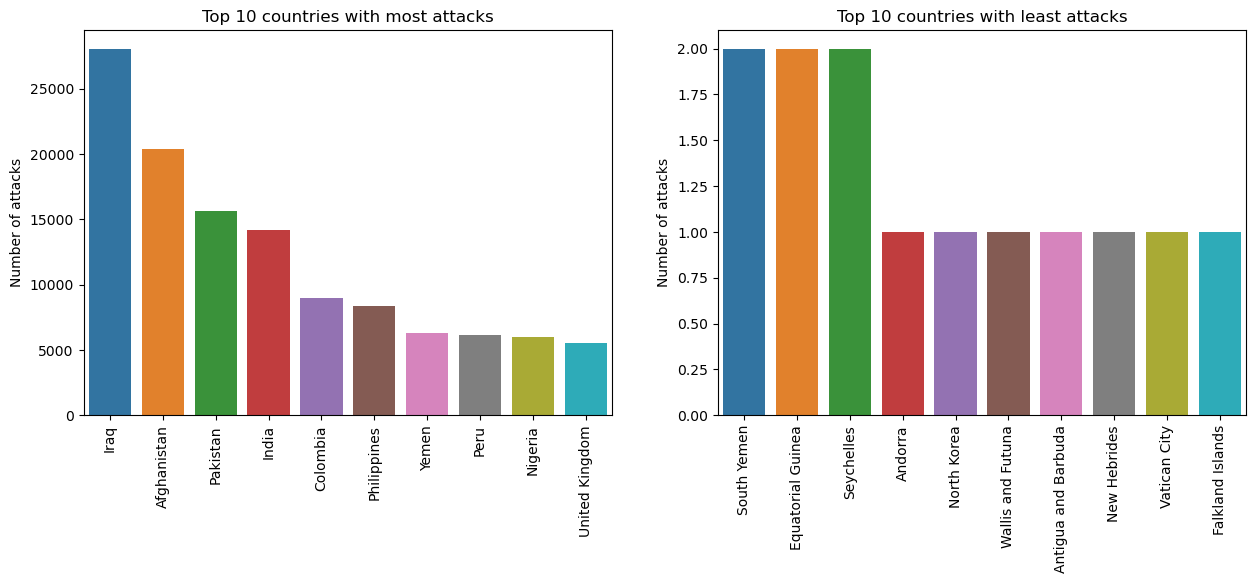

In [13]:
# Plot the top 20 countries with the most attacks, use column 'country_txt', and sort by the number of attacks, tilt x-axis labels by 90 degrees. THe number of attacks is the number of rows for each country
# At the right hand side, do the same plot but with the 20 countries with the least attacks. The number of attacks is the number of rows for each country
# make subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# remove attack with international as country
GTD = GTD[GTD['country_txt'] != 'International']
# plot top 20 countries with most attacks
sns.barplot(x=GTD['country_txt'].value_counts().head(10).index,
            y=GTD['country_txt'].value_counts().head(10).values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 10 countries with most attacks')
# y axis label
ax1.set_ylabel('Number of attacks')
# plot top 20 countries with least attacks
sns.barplot(x=GTD['country_txt'].value_counts().tail(10).index,
            y=GTD['country_txt'].value_counts().tail(10).values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Top 10 countries with least attacks')
# y axis label
ax2.set_ylabel('Number of attacks')
plt.show()


### Types of attacks

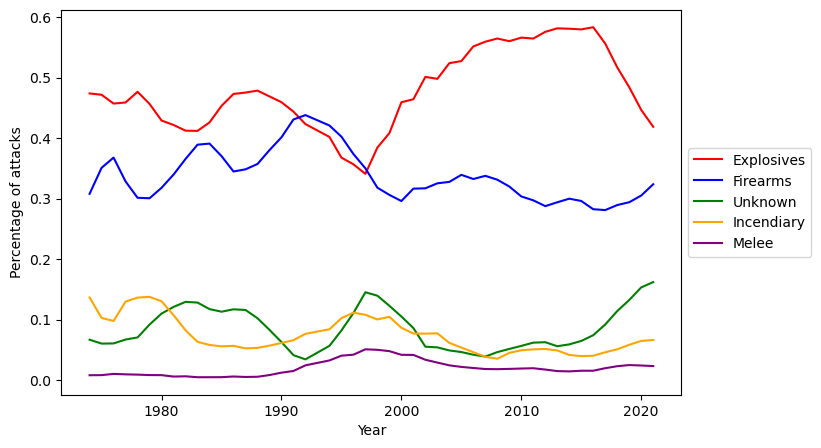

In [14]:
# For the top 5 overall weapons used, plot the number of attacks per year
# in one plot, with a different line for each weapon. The plot should contain lines, not bars.
# create a list of weapons
weapons = GTD['weaptype1_txt'].value_counts().head(5).index
# create a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
# create a figure
fig, ax = plt.subplots(figsize=(8, 5))
# iterate over weapons and colors
for weapon, color in zip(weapons, colors):
    # filter the data
    GTD_weapon = GTD[GTD['weaptype1_txt'] == weapon]
    # plot percentage of attacks per year that used this weapon, use a rolling average of 5 years
    plt.plot((GTD_weapon['iyear'].value_counts().sort_index() / GTD['iyear'].value_counts().sort_index()).rolling(5).mean(), color=color)
ax.legend(weapons, loc='center left', bbox_to_anchor=(1, 0.5))
# add axis
plt.xlabel('Year')
plt.ylabel('Percentage of attacks')

plt.show()


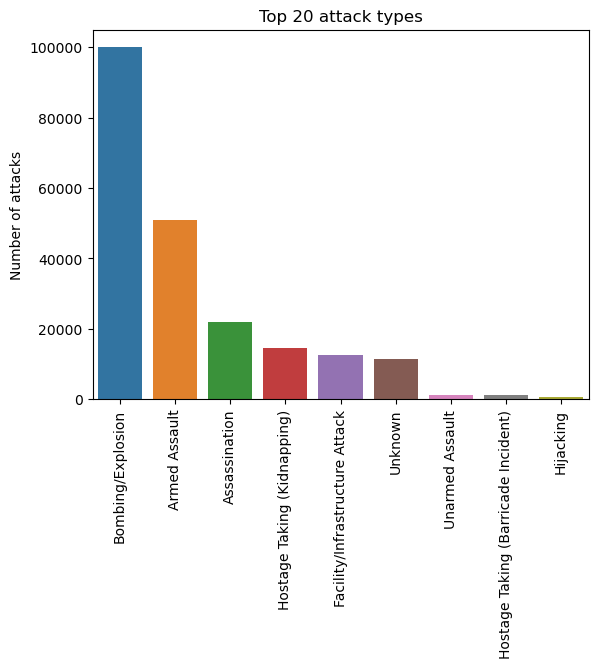

In [15]:
# Do the same plot as above, but now for the column 'attacktype1_txt', which contains the type of attack. The number of attacks is the number of rows for each attack type
sns.barplot(x=GTD['attacktype1_txt'].value_counts().head(
    20).index, y=GTD['attacktype1_txt'].value_counts().head(20).values)
# title and y axis label
plt.title('Top 20 attack types')
plt.ylabel('Number of attacks')
# tilt x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

### Types of targets

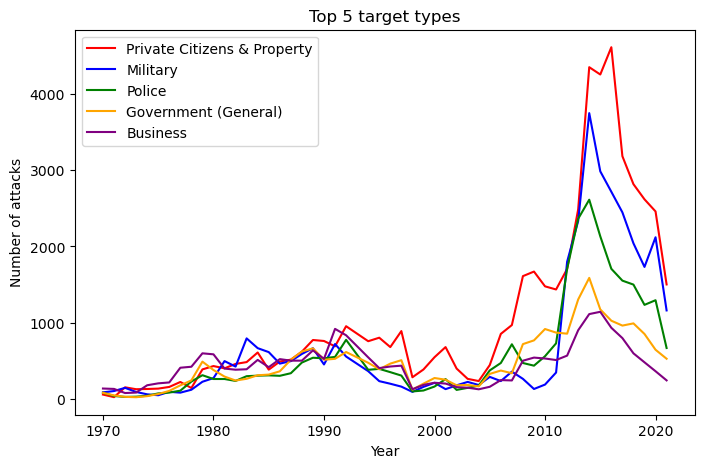

In [16]:
# Do the same for the top 5 target types
# create a list of target types
targets = GTD['targtype1_txt'].value_counts().head(5).index
# create a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
# create a figure
fig, ax = plt.subplots(figsize=(8, 5))
# iterate over target types and colors
for target, color in zip(targets, colors):
    # filter the data
    GTD_target = GTD[GTD['targtype1_txt'] == target]
    # plot the data, do not use sns lineplot
    GTD_target.groupby('iyear')['iyear'].count().plot(ax=ax, color=color)
# set title
ax.set_title('Top 5 target types')
# set x axis label and y axis label
ax.set_xlabel('Year')
ax.set_ylabel('Number of attacks')
# add legend
ax.legend(targets)
plt.show()

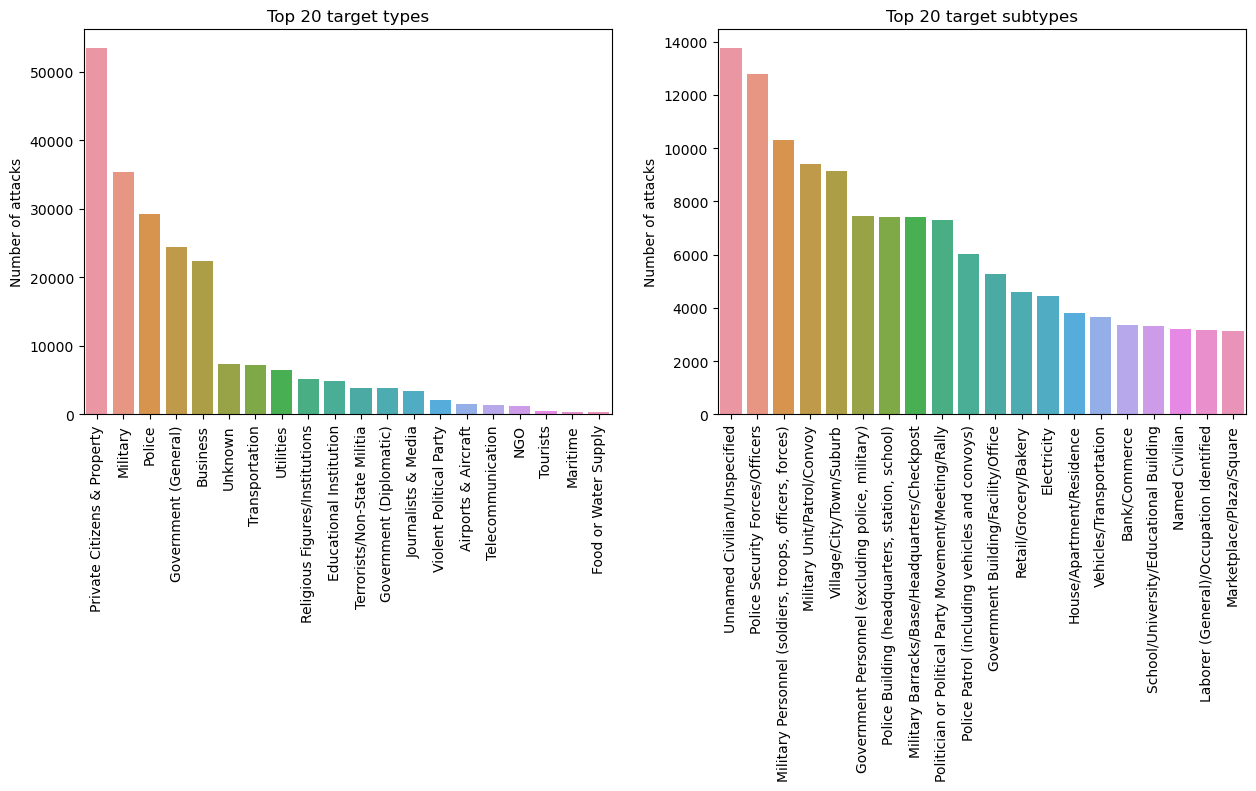

In [17]:
# Do the same, but now for the column 'targtype1_txt', which contains the type of target. The number of attacks is the number of rows for each target type
# On the right hand side, do it for the column 'targsubtype1_txt', which contains the subtype of target. The number of attacks is the number of rows for each target subtype
# make subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# plot top 20 target types
sns.barplot(x=GTD['targtype1_txt'].value_counts().head(20).index, y=GTD['targtype1_txt'].value_counts().head(20).values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 20 target types')
# y axis label
ax1.set_ylabel('Number of attacks')
# plot top 20 target subtypes
sns.barplot(x=GTD['targsubtype1_txt'].value_counts().head(20).index, y=GTD['targsubtype1_txt'].value_counts().head(20).values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Top 20 target subtypes')
# y axis label
ax2.set_ylabel('Number of attacks')
plt.show()



### Motives

In [18]:
# the percentage of null motive with 2 decimal places
print("The percentage of null motive is:", round(
    GTD['motive'].isnull().sum() / len(GTD) * 100, 2), "%")


The percentage of null motive is: 74.01 %


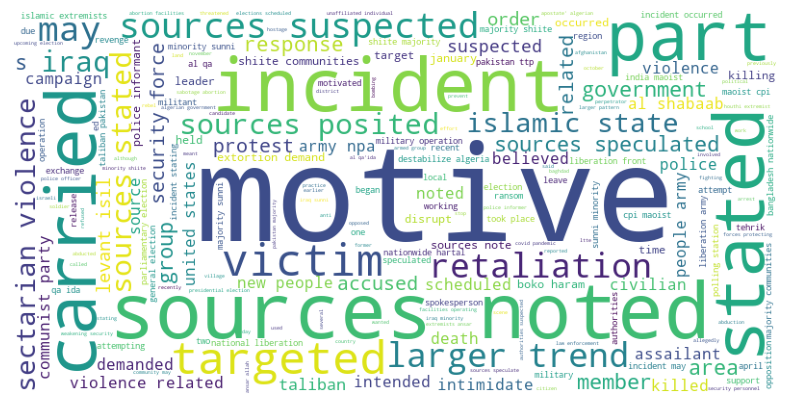

In [19]:
from wordcloud import WordCloud

# Make a wordcloud of the motives
# create a list of motives
motives = GTD['motive'].dropna().values.tolist()
# create a string of motives
motives = ' '.join(motives)
# lower case all words
motives = motives.lower()
irrelevant_words = ['unknown', 'specific', 'claimed', 'responsibility', 'attack']
# Remove irrelevant words
for word in irrelevant_words:
    motives = motives.replace(word, '')
# create a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(motives)
# plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



### Terrorist groups

In [20]:
# the number of groups in the dataset
print("The number of groups is:", GTD['gname'].nunique())
# the number of groups with more than 1000 attacks
print("The number of groups with more than 1000 attacks:", GTD['gname'].value_counts()[GTD['gname'].value_counts() > 1000].count())

The number of groups is: 3767
The number of groups with more than 1000 attacks: 21


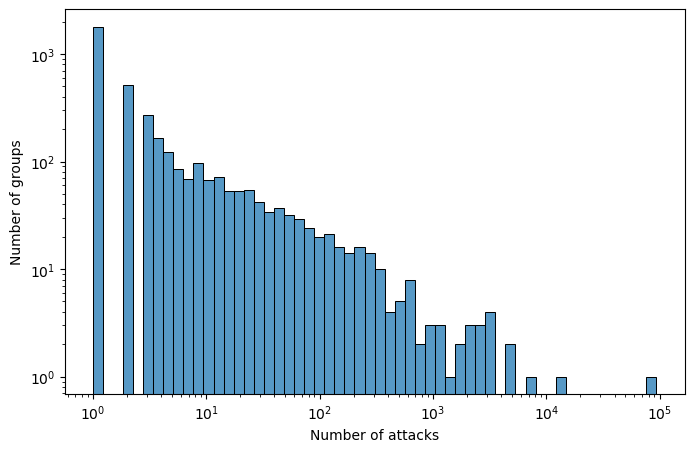

In [21]:
# plot the distribution of attacks per group
fig, ax = plt.subplots(figsize=(8, 5))
# plot the log-log of the number of attacks per group
sns.histplot(GTD['gname'].value_counts(), log_scale=(True, True), ax=ax)
ax.set_xlabel('Number of attacks')
ax.set_ylabel('Number of groups')
plt.show()

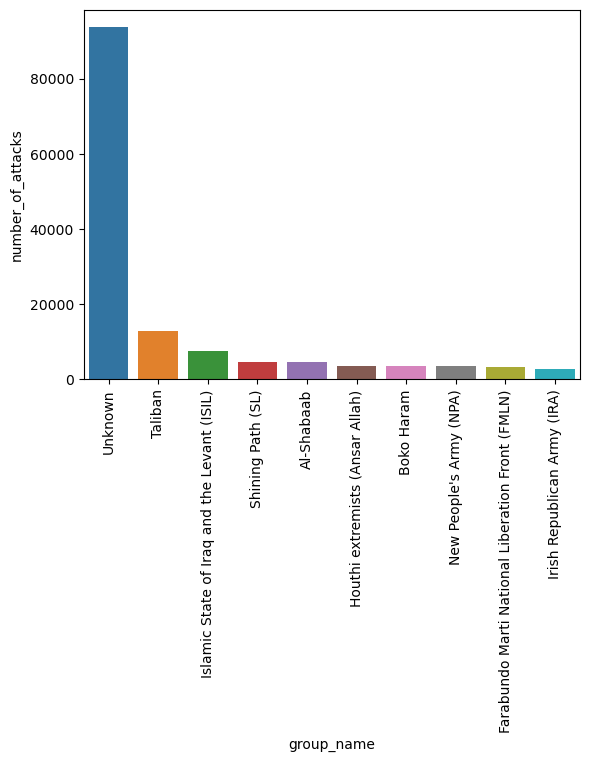

In [22]:
# Plot the 10 largest groups in terms of number of attacks
# In one barplot

# create a dataframe with the number of attacks per group
GTD_group = GTD['gname'].value_counts().to_frame()
# rename the column
GTD_group.rename(columns={'gname': 'number_of_attacks'}, inplace=True)
# reset the index
GTD_group.reset_index(inplace=True)
# rename the columns
GTD_group.rename(columns={'index': 'group_name'}, inplace=True)
# plot the top 10 groups
sns.barplot(x='group_name', y='number_of_attacks', data=GTD_group.head(10))
# tilt x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()



In [23]:
top_10_groups = GTD.groupby('gname').count()['eventid'].sort_values()[-10:].index
print('The top 20 groups are:', list(top_10_groups))

The top 20 groups are: ['Irish Republican Army (IRA)', 'Farabundo Marti National Liberation Front (FMLN)', "New People's Army (NPA)", 'Boko Haram', 'Houthi extremists (Ansar Allah)', 'Al-Shabaab', 'Shining Path (SL)', 'Islamic State of Iraq and the Levant (ISIL)', 'Taliban', 'Unknown']


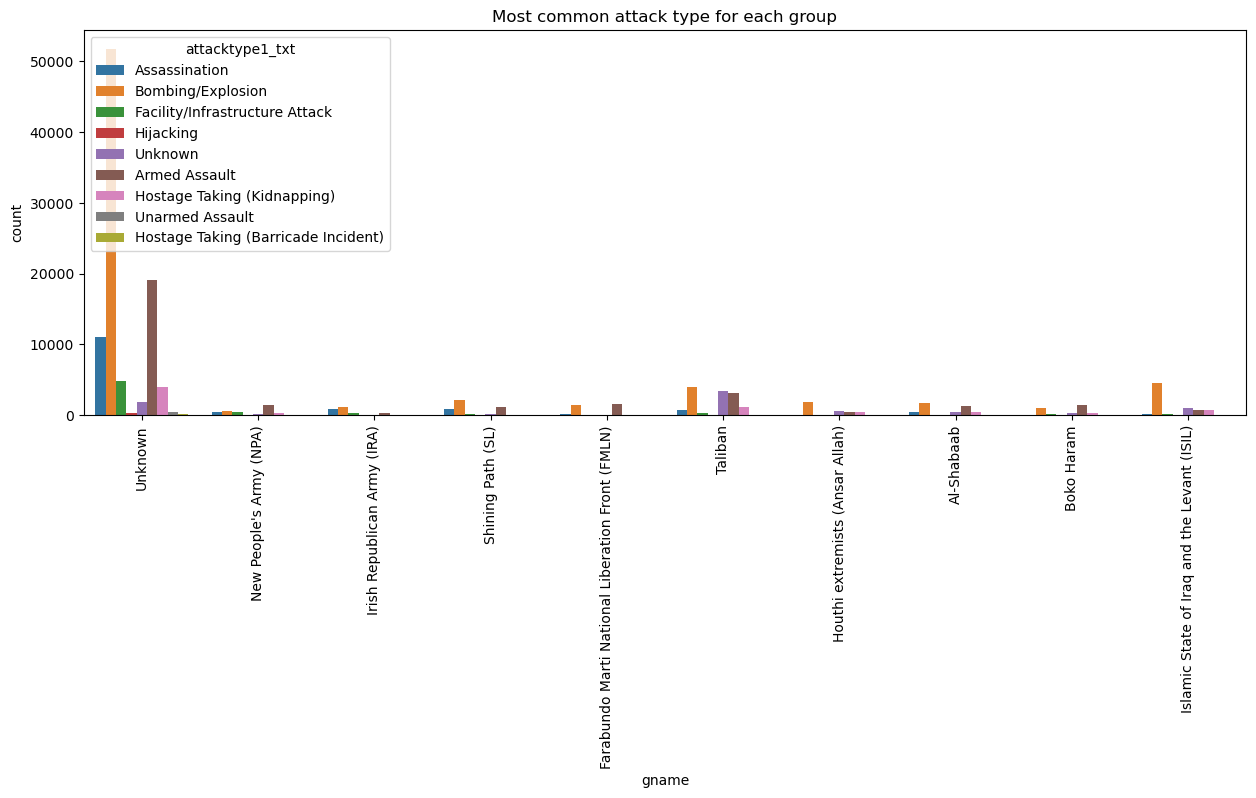

In [24]:
# plot the most commot attack type for each group
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(x='gname', hue='attacktype1_txt', data=GTD[GTD['gname'].isin(top_10_groups)], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Most common attack type for each group')
plt.show()

## Part 2: Profiles of Perpetrators of Terrorism in the United States

In [33]:
# Read PPTUS dataset or create it 
PPTUS_path = 'data/PPTUS.pkl'
PPTUS_filepath = 'data/PPT-US_0517dist.xlsx' 

if os.path.exists(PPTUS_path): 
    PPTUS = pd.read_pickle(PPTUS_path)
elif os.path.exists(PPTUS_filepath):
    PPTUS = pd.read_excel(PPTUS_filepath)
    PPTUS.to_pickle(PPTUS_path)
else:
    print('PPTUS data not found, please download and put it in data/ folder.')

PPTUS.head()

,ORGNAME,MOD_DATE,INGROUP,ALIAS,ALIAS_CI,ALIAS_SOURCE,GATK_FIRST_MONTH,GATK_FIRST_DAY,GATK_FIRST_YEAR,GATK_FIRST_CI,GATK_FIRST_SOURCE,GATK_LAST_MONTH,GATK_LAST_DAY,GATK_LAST_YEAR,GATK_LAST_CI,GATK_LAST_SOURCE,USATK_FIRST_MONTH,USATK_FIRST_DAY,USATK_FIRST_YEAR,USATK_FIRST_CI,USATK_FIRST_SOURCE,USATK_LAST_MONTH,USATK_LAST_DAY,USATK_LAST_YEAR,USATK_LAST_CI,USA_LAST_SOURCE,LOC_ATK_COUNTRY_1,LOC_ATK_COUNTRY_1_CI,LOC_ATK_COUNTRY_1_SOURCE,LOC_ATK_COUNTRY_2,LOC_ATK_COUNTRY_2_CI,LOC_ATK_COUNTRY_2_SOURCE,LOC_ATK_COUNTRY_3,LOC_ATK_COUNTRY_3_CI,LOC_ATK_COUNTRY_3_SOURCE,LOC_ATK_COUNTRY_4,LOC_ATK_COUNTRY_4_CI,LOC_ATK_COUNTRY_4_SOURCE,LOC_ATK_COUNTRY_5,LOC_ATK_COUNTRY_5_CI,LOC_ATK_COUNTRY_5_SOURCE,LOC_HQ_COUNTRY_1,LOC_HQ_COUNTRY_1_CI,LOC_HQ_COUNTRY_1_SOURCE,LOC_HQ_COUNTRY_2,LOC_HQ_COUNTRY_2_CI,LOC_HQ_COUNTRY_2_SOURCE,LOC_HQ_COUNTRY_3,LOC_HQ_COUNTRY_3_CI,LOC_HQ_COUNTRY_3_SOURCE,LOC_HQ_COUNTRY_4,LOC_HQ_COUNTRY_4_CI,LOC_HQ_COUNTRY_4_SOURCE,LOC_HQ_COUNTRY_5,LOC_HQ_COUNTRY_5_CI,LOC_HQ_COUNTRY_5_SOURCE,LOC_USATK_STATE_1,LOC_USATK_STATE_CI_1,LOC_USATK_STATE_SOURCE_1,LOC_USATK_STATE_2,LOC_USATK_STATE_CI_2,LOC_USATK_STATE_SOURCE_2,LOC_USATK_STATE_3,LOC_USATK_STATE_CI_3,LOC_USATK_STATE_SOURCE_3,LOC_USATK_STATE_4,LOC_USATK_STATE_CI_4,LOC_USATK_STATE_SOURCE_4,LOC_USATK_STATE_5,LOC_USATK_STATE_CI_5,LOC_USATK_STATE_SOURCE_5,LOC_USAHQ_STATE_1,LOC_USAHQ_STATE_CI_1,LOC_USAHQ_STATE_SOURCE_1,LOC_USAHQ_STATE_2,LOC_USAHQ_STATE_CI_2,LOC_USAHQ_STATE_SOURCE_2,LOC_USAHQ_STATE_3,LOC_USAHQ_STATE_CI_3,LOC_USAHQ_STATE_SOURCE_3,LOC_USAHQ_STATE_4,LOC_USAHQ_STATE_CI_4,LOC_USAHQ_STATE_SOURCE_4,LOC_USAHQ_STATE_5,LOC_USAHQ_STATE_CI_5,LOC_USAHQ_STATE_SOURCE_5,HIS,HIS_CLEAN,HIS_CI,HIS_SOURCE,DFORM_MONTH,DFORM_DAY,DFORM_YEAR,DFORM_CI,DFORM_SOURCE,PHIL,PHIL_CLEAN,PHIL_CI,PHIL_SOURCE,NOTABLE,NOTABLE _CLEAN,NOTABLE_CI,NOTABLE_SOURCE,DOM_I,DOM_I_CI,DOM_I_SOURCE,I_ETHNO,I_ETHNO_CI,I_ETHNO_SOURCE,I_REL,I_REL_CI,I_REL_SOURCE,I_REL_1,I_REL_1_CI,I_REL_1_SOURCE,I_REL_2,I_REL_2_CI,I_REL_2_SOURCE,I_REL_3,I_REL_3_CI,I_REL_3_SOURCE,I_REL_4,I_REL_4_CI,I_REL_4_SOURCE,I_REL_5,I_REL_5_CI,I_REL_5_SOURCE,I_REL_6,I_REL_6_CI,I_REL_6_SOURCE,I_REL_7,I_REL_7_CI,I_REL_7_SOURCE,I_REL_8,I_REL_8_CI,I_REL_8_SOURCE,I_REL_9,I_REL_9_CI,I_REL_9_SOURCE,I_REL_10,I_REL_10_CI,I_REL_10_SOURCE,I_RACE,I_RACE_CI,I_RACE_SOURCE,I_RACE_1,I_RACE_1_CI,I_RACE_1_SOURCE,I_RACE_2,I_RACE_2_CI,I_RACE_2_SOURCE,I_RACE_3,I_RACE_3_CI,I_RACE_3_SOURCE,I_LEFT,I_LEFT_CI,I_LEFT_SOURCE,I_LEFT_1,I_LEFT_1_CI,I_LEFT_1_SOURCE,I_LEFT_2,I_LEFT_2_CI,I_LEFT_2_SOURCE,I_LEFT_3,I_LEFT_3_CI,I_LEFT_3_SOURCE,I_LEFT_4,I_LEFT_4_CI,I_LEFT_4_SOURCE,I_LEFT_5,I_LEFT_5_CI,I_LEFT_5_SOURCE,I_LEFT_6,I_LEFT_6_CI,I_LEFT_6_SOURCE,I_RIGHT,I_RIGHT_CI,I_RIGHT_SOURCE,I_RIGHT_1,I_RIGHT_1_CI,I_RIGHT_1_SOURCE,I_RIGHT_2,I_RIGHT_2_CI,I_RIGHT_2_SOURCE,I_RIGHT_3,I_RIGHT_3_CI,I_RIGHT_3_SOURCE,I_RIGHT_4,I_RIGHT_4_CI,I_RIGHT_4_SOURCE,I_SI,I_SI_CI,I_SI_SOURCE,I_SI_1,I_SI_1_CI,I_SI_1_SOURCE,I_SI_2,I_SI_2_CI,I_SI_2_SOURCE,I_SI_3,I_SI_3_CI,I_SI_3_SOURCE,I_SI_4,I_SI_4_CI,I_SI_4_SOURCE,I_SI_5,I_SI_5_CI,I_SI_5_SOURCE,I_SI_6,I_SI_6_CI,I_SI_6_SOURCE,I_SI_7,I_SI_7_CI,I_SI_7_SOURCE,I_SI_8,I_SI_8_CI,I_SI_8_SOURCE,I_SI_9,I_SI_9_CI,I_SI_9_SOURCE,I_SI_10,I_SI_10_CI,I_SI_10_SOURCE,I_SI_11,I_SI_11_CI,I_SI_11_SOURCE,I_SI_12,I_SI_12_CI,I_SI_12_SOURCE,I_SI_13,I_SI_13_CI,I_SI_13_SOURCE,I_SI_14,I_SI_14_CI,I_SI_14_SOURCE,G_POL_1,G_POL_1_CI,G_POL_1_SOURCE,G_POL_2,G_POL_2_CI,G_POL_2_SOURCE,G_POL_3,G_POL_3_CI,G_POL_3_SOURCE,G_POL_4,G_POL_4_CI,G_POL_4_SOURCE,G_POL_5,G_POL_5_CI,G_POL_5_SOURCE,G_POL_OTH,G_POL_OTH_TXT,G_POL_OTH_CI,G_POL_OTH_SOURCE,G_SOC_1,G_SOC_1_CI,G_SOC_1_SOURCE,G_SOC_2,G_SOC_2_CI,G_SOC_2_SOURCE,G_SOC_OTH,G_SOC_OTH_TXT,G_SOC_OTH_CI,G_SOC_OTH_SOURCE,G_ECO_1,G_ECO_1_CI,G_ECO_1_SOURCE,G_ECO_2,G_ECO_2_CI,G_ECO_2_SOURCE,G_ECO_OTH,G_ECO_OTH_TXT,G_ECO_OTH_CI,G_ECO_OTH_SOURCE,G_REL_1,G_REL_1_CI,G_REL_1_SOURCE,G_REL_2,G_REL_2_CI,G_REL_2_SOURCE,G_REL_3,G_REL_3_CI,G_REL_3_SOURCE,G_REL_OTH,G_REL_OTH_TXT,G_REL_OTH_CI,G_REL_OTH_SOURCE,OA_POL_1,OA_POL_1_CI,OA_POL_1_SOURCE,OA_POL_2,OA_POL_2_CI,OA_POL_2_SOUR